In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re
from Util.data_helper import load

sns.set()
%matplotlib inline

In [13]:
# Load DataFrames
categories = ['Kindle', 'Magazine']
frames = []
for category in categories:
    for root, dirs, files in os.walk(category + '/'):
        for name in files:
            if re.match(r"DataFrame.pkl", name):
                frames.append(load(root + '/' + name))
data = pd.concat(frames, ignore_index=True)
data.loc[data['model_type']=='Unif_Sampling', 'model_type'] = 'Uniform'
data.loc[data['model_type']=='Logreg_Baseline_1_layer', 'model_type'] = 'Log. Regr.'
data.loc[data['model_type']=='Logreg_SentEmbs_1_layer', 'model_type'] = 'SentEmbs'
data.loc[data['context']=='no_context', 'context'] = 'No Context'
data.loc[data['context']=='train_sent_embs', 'context'] = 'Using Context'
data.loc[data['category']=='Magazine_Subs', 'category'] = 'Magazine Subscriptions'
data.rename(columns = {'model_type': 'Model Type', 'category': 'Category'}, inplace = True)


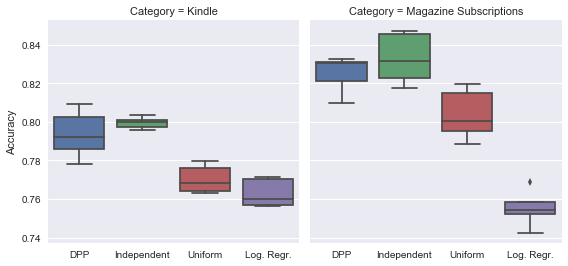

In [14]:
# Comparing models

test = data['dataset'] == 'test'
Kindle = data['Category'] == 'Kindle'
Magazine = data['Category'] == 'Magazine Subscriptions'

context = data['context'] == 'train_context'
testset = data['test_set_num_prods'] == False
num_sents3 = data['num_target_sentences'] == 3
model = (data['Model Type'] == 'DPP') | (data['Model Type'] == 'Uniform') | \
        (data['Model Type'] == 'Independent') | (data['Model Type'] == 'Log. Regr.') | (data['Model Type'] == 'SentEmbs')
DF_Kindle = data[test & context & testset & model & num_sents3 & Kindle]  
DF_Magazine = data[test & context & testset & model & num_sents3 & Magazine]
DF = data[test & context & testset & model & num_sents3]

s =  sns.factorplot('Model Type',"accuracy", col='Category', data=DF, kind="box", order=['DPP', 'Independent', 'Uniform', 'Log. Regr.',])
s.set_axis_labels("", "Accuracy");


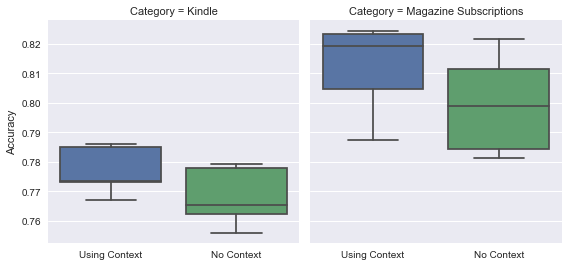

In [15]:
# Comparing with and without context
Kindle = data['Category'] == 'Kindle'
Magazine = data['Category'] == 'Magazine Subscriptions'

context = data['context'] != 'train_context'
no_context = data['context'] == 'No Context'
using_context = data['context'] == 'Using Context'
testset = data['test_set_num_prods'] == False
num_sents3 = data['num_target_sentences'] == 3
num_sents6 = data['num_target_sentences'] == 6
model = (data['Model Type'] == 'DPP')
DF_Kindle = data[test & context & testset & model & num_sents3 & Kindle]  
DF_Magazine = data[test & context & testset & model & num_sents3 & Magazine]
DF = data[test & context & num_sents3 & model]

s = sns.factorplot("context","accuracy", col="Category", data=DF, kind="box", order=['Using Context', 'No Context'])
s.set_axis_labels("", "Accuracy");

#s =  sns.factorplot("context","accuracy", data=DF_Kindle, kind="box")
#s.set_axis_labels("Kindle", "Accuracy");
#s =  sns.factorplot("context","accuracy", data=DF_Magazine, kind="box")
#s.set_axis_labels("Magazine", "Accuracy");


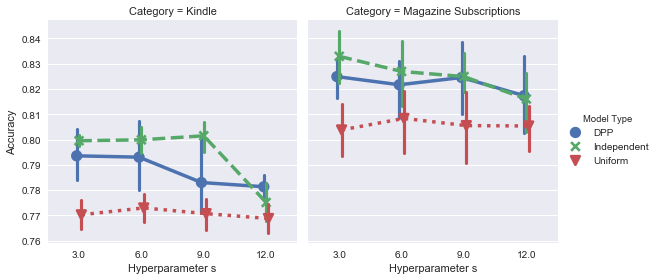

In [19]:
# Comparing num_sents
test = data['dataset'] == 'test'
Kindle = data['Category'] == 'Kindle'
Magazine = data['Category'] == 'Magazine Subscriptions'

context = data['context'] == 'train_context'
testset = data['test_set_num_prods'] == False
num_sents3 = data['num_target_sentences'] == 3
model = (data['Model Type'] == 'DPP') | (data['Model Type'] == 'Independent') | (data['Model Type'] == 'Uniform')
DF_Kindle = data[test & testset & context & model & Kindle]  
DF_Magazine = data[test & testset & model & context & Magazine]
DF = data[test & testset & model & context]

s = sns.factorplot("num_target_sentences", "accuracy", "Model Type", col='Category', data=DF, 
                   dodge=True, scale = 1.1,
                  markers=["o", "x", "v"], linestyles=["-", "--", ":"],
                  hue_order=['DPP','Independent','Uniform'])
s.set_axis_labels("Hyperparameter s", "Accuracy");

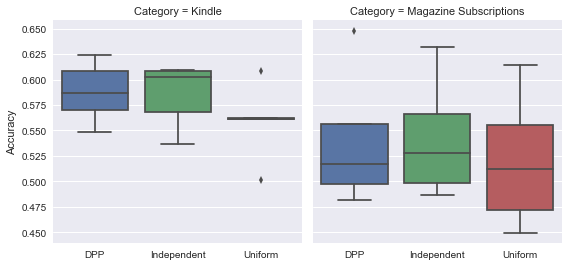

In [21]:
# Comparing New Test products
test = data['dataset'] == 'test'
Kindle = data['Category'] == 'Kindle'
Magazine = data['Category'] == 'Magazine Subscriptions'

context = data['context'] == 'train_context'
testset = data['test_set_num_prods'] == True
num_sents3 = data['num_target_sentences'] == 3
model = (data['Model Type'] == 'DPP') | (data['Model Type'] == 'Independent') | (data['Model Type'] == 'Uniform')
DF_Kindle = data[test & testset & context & model & num_sents3 & Kindle]  
DF_Magazine = data[test & testset & model & context & num_sents3 & Magazine]
DF = data[test & testset & model & context & num_sents3]


s =  sns.factorplot("Model Type", "accuracy", col='Category', data=DF, kind="box", order=['DPP', 'Independent', 'Uniform'])
s.set_axis_labels("", "Accuracy");